In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import skew, kurtosis

import seaborn as sns

import statistics as stat

from statsmodels.formula.api import logit

#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\Desktop\D208 Assessment Files\medical_clean.csv')

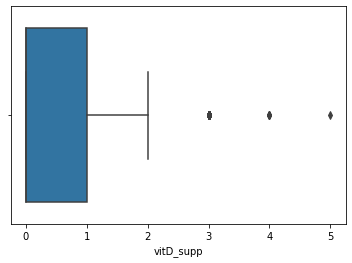

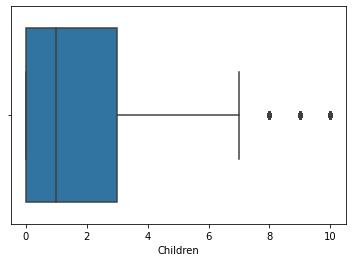

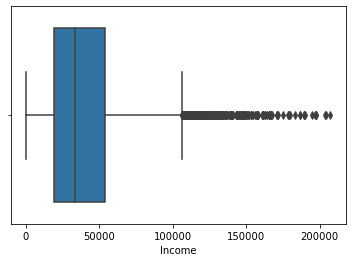

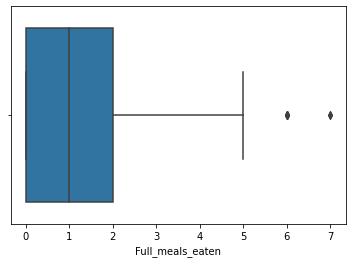

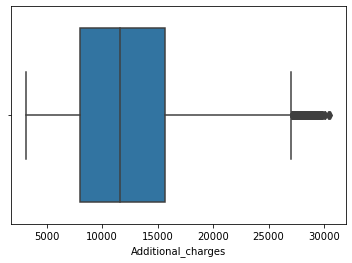

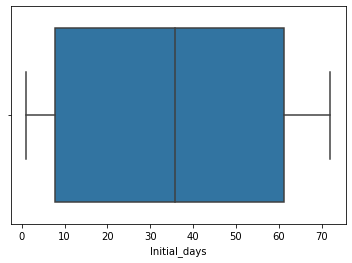

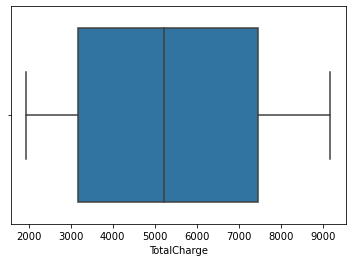

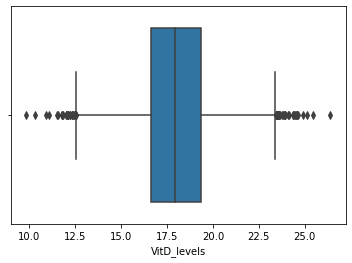

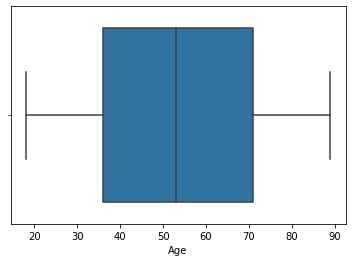

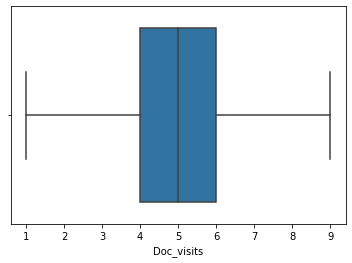

In [3]:
#Detection of outliers
boxplot=sns.boxplot(x='vitD_supp',data=df)
plt.show()
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='Full_meals_eaten',data=df)
plt.show()
boxplot=sns.boxplot(x='Additional_charges',data=df)
plt.show()
boxplot=sns.boxplot(x='Initial_days',data=df)
plt.show()
boxplot=sns.boxplot(x='TotalCharge',data=df)
plt.show()
boxplot=sns.boxplot(x='VitD_levels',data=df)
plt.show()
boxplot=sns.boxplot(x='Age',data=df)
plt.show()
boxplot=sns.boxplot(x='Doc_visits',data=df)
plt.show()

In [4]:
#Data Wrangling; turn categorical values into quantitative data
df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Soft_drink_numeric'] = df['Soft_drink']
dict_Soft_drink = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Soft_drink, inplace=True)

df['HighBlood_numeric'] = df['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_HighBlood, inplace=True)

df['Stroke_numeric'] = df['Stroke']
dict_stroke = {"Stroke_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_stroke, inplace=True)

df['Arthritis_numeric'] = df['Arthritis']
dict_arthritis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_arthritis, inplace=True)

df['Diabetes_numeric'] = df['Diabetes']
dict_diabetes = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_diabetes, inplace=True)

df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']
dict_hyperlipidemia = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_hyperlipidemia, inplace=True)

df['BackPain_numeric'] = df['BackPain']
dict_backpain = {"BackPain_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_backpain, inplace=True)

df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']
dict_allergies = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_allergies, inplace=True)

df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']
dict_reflux = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_reflux, inplace=True)

df['Asthma_numeric'] = df['Asthma']
dict_asthma = {"Asthma_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_asthma, inplace=True)

df['Overweight_numeric'] = df['Overweight']
dict_Overweight = {"Overweight_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Overweight, inplace=True)

df['Anxiety_numeric'] = df['Anxiety']
dict_Anxiety = {"Anxiety_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Anxiety, inplace=True)

df = pd.get_dummies(df, columns=["Marital", "Services", "Gender", "Initial_admin", "Complication_risk"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [5]:
#Renaming columns from pd.get_dummies
df = df.rename({'Initial_admin_Elective Admission': 'Initial_admin_Elective_Admission', 
                'Initial_admin_Emergency Admission': 'Initial_admin_Emergency_Admission', 
                'Initial_admin_Observation Admission': 'Initial_admin_Observation_Admission',
                'Marital_Never Married': 'Marital_Never_Married',
                'Services_Blood Work': 'Services_Blood_Work',
                'Services_CT Scan': 'Services_CT_Scan'}, axis ='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [6]:
##Univariate Stats Dataframe, and dropping unneeded and redundant columns
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', 'Median', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(), df[col].mode().values[0], df[col].min(), df[col].median(), df[col].max(), df[col].std(), df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending=False)

df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'State', 'County', 'Job', 'Zip', 'TimeZone', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Marital_Divorced', 'Gender_Female', 'Overweight', 'Anxiety', 'City', 'Area'], inplace=True)
print(unistats(df))

                                     Count  Missing  Unique    Dtype  Numeric  \
Gender_Nonbinary                     10000        0       2    uint8     True   
Services_MRI                         10000        0       2    uint8     True   
Services_CT_Scan                     10000        0       2    uint8     True   
Population                           10000        0    5951    int64     True   
vitD_supp                            10000        0       6    int64     True   
Marital_Never_Married                10000        0       2    uint8     True   
Marital_Separated                    10000        0       2    uint8     True   
Stroke_numeric                       10000        0       2    int64     True   
Marital_Married                      10000        0       2    uint8     True   
Marital_Widowed                      10000        0       2    uint8     True   
Children                             10000        0      11    int64     True   
Income                      

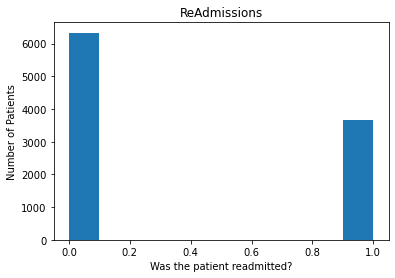

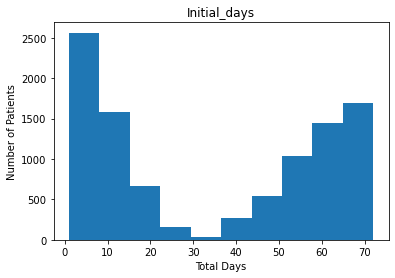

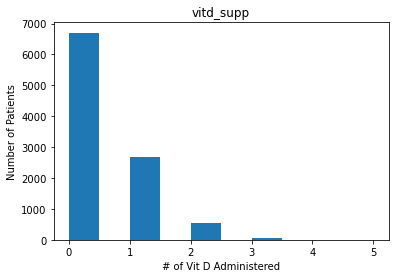

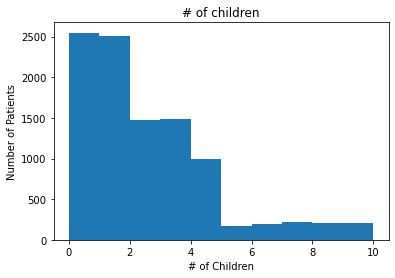

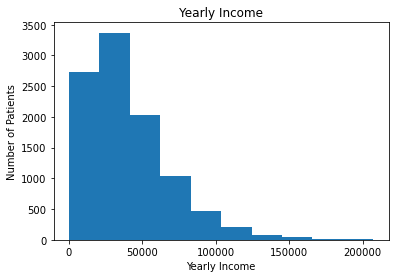

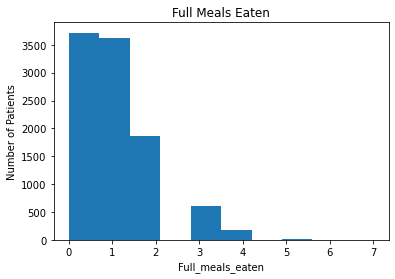

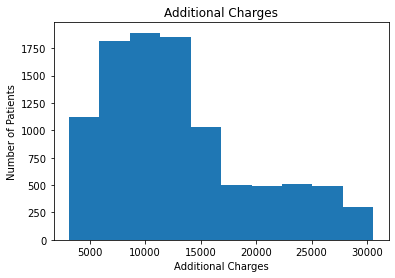

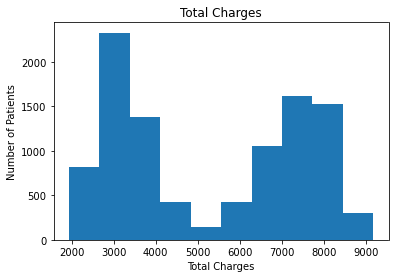

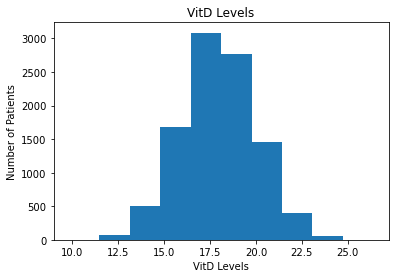

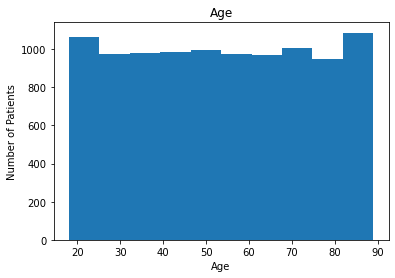

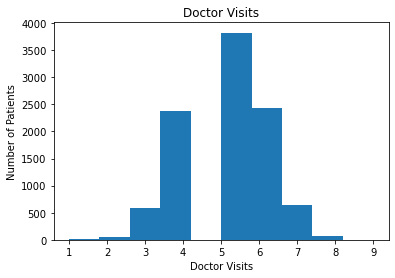

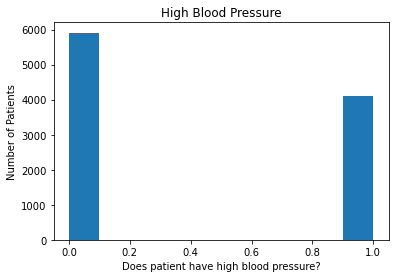

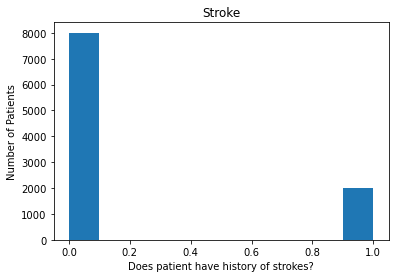

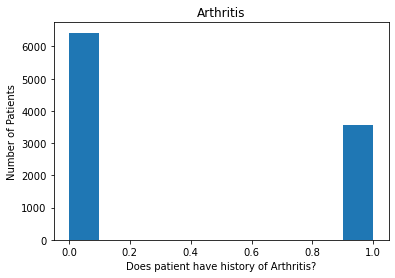

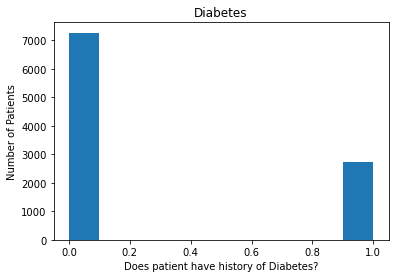

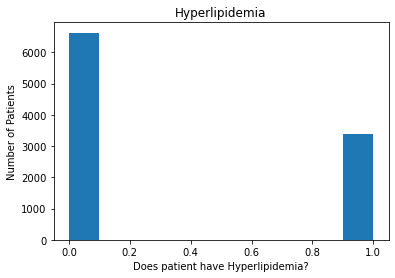

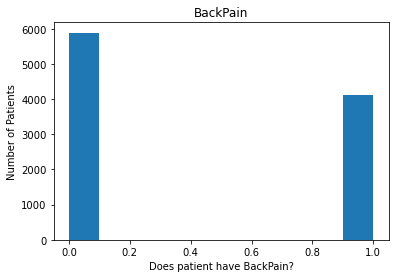

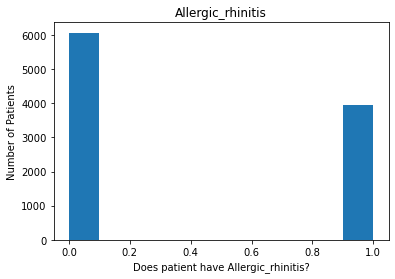

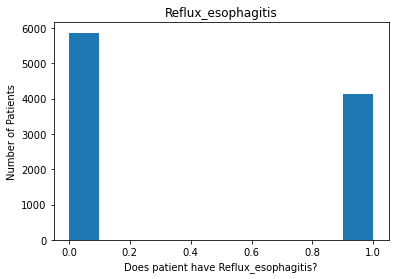

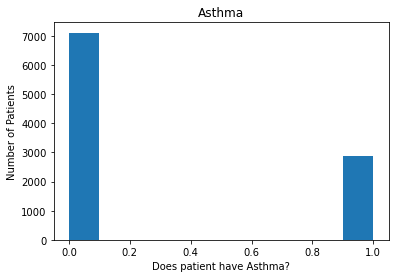

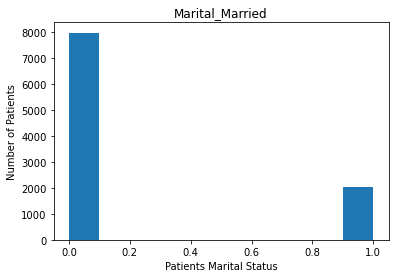

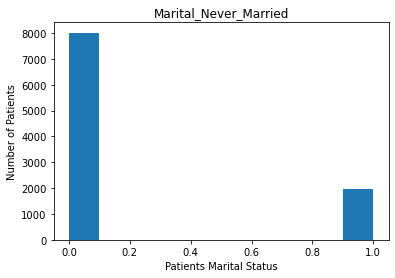

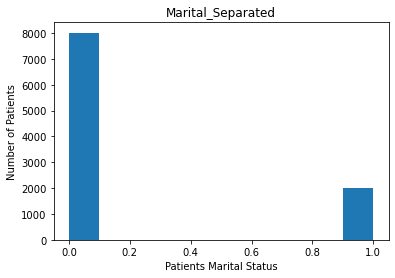

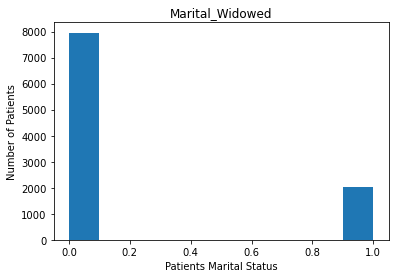

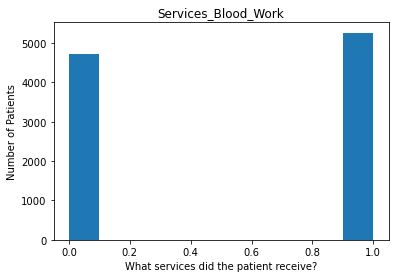

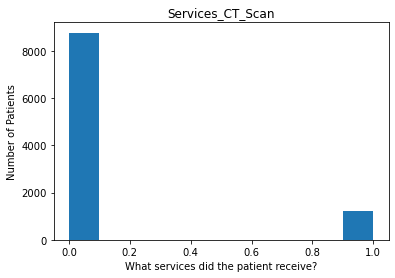

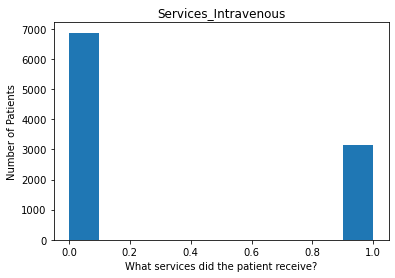

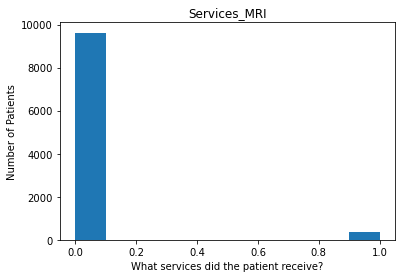

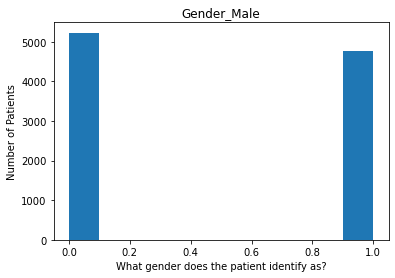

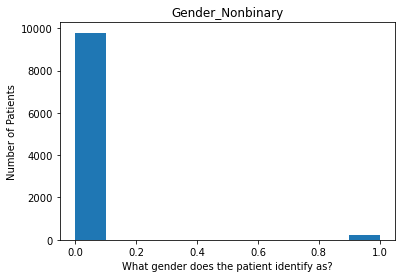

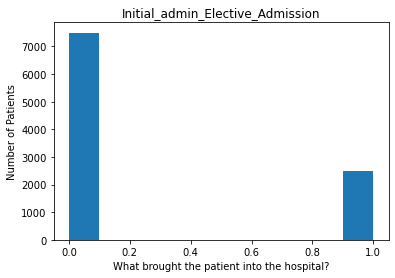

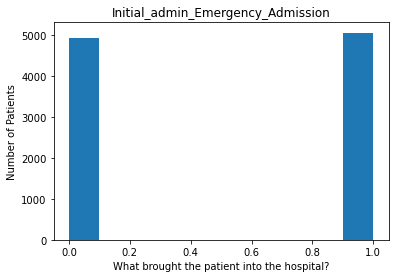

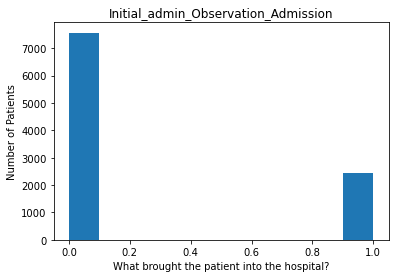

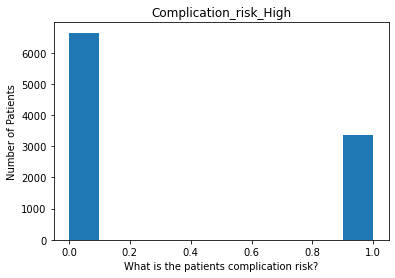

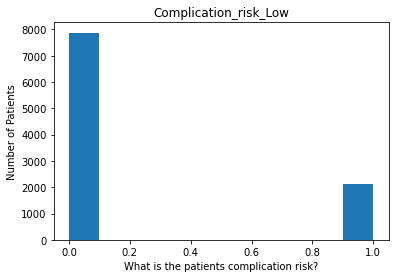

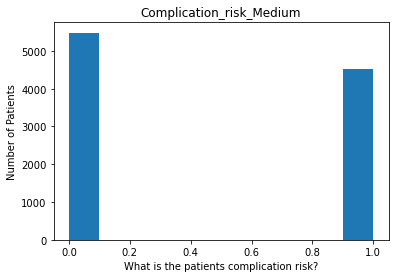

In [8]:
#Univariate Visualizations
plt.hist(df.ReAdmis_numeric)
plt.xlabel('Was the patient readmitted?')
plt.ylabel('Number of Patients')
plt.title('ReAdmissions')
plt.show()

plt.hist(df.Initial_days)
plt.xlabel('Total Days')
plt.ylabel('Number of Patients')
plt.title('Initial_days')
plt.show()

plt.hist(df.vitD_supp)
plt.xlabel('# of Vit D Administered')
plt.ylabel('Number of Patients')
plt.title('vitd_supp')
plt.show()

plt.hist(df.Children)
plt.xlabel('# of Children')
plt.ylabel('Number of Patients')
plt.title('# of children')
plt.show()

plt.hist(df.Income)
plt.xlabel('Yearly Income')
plt.ylabel('Number of Patients')
plt.title('Yearly Income')
plt.show()

plt.hist(df.Full_meals_eaten)
plt.xlabel('Full_meals_eaten')
plt.ylabel('Number of Patients')
plt.title('Full Meals Eaten')
plt.show()

plt.hist(df.Additional_charges)
plt.xlabel('Additional Charges')
plt.ylabel('Number of Patients')
plt.title('Additional Charges')
plt.show()

plt.hist(df.TotalCharge)
plt.xlabel('Total Charges')
plt.ylabel('Number of Patients')
plt.title('Total Charges')
plt.show()

plt.hist(df.VitD_levels)
plt.xlabel('VitD Levels')
plt.ylabel('Number of Patients')
plt.title('VitD Levels')
plt.show()

plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age')
plt.show()

plt.hist(df.Doc_visits)
plt.xlabel('Doctor Visits')
plt.ylabel('Number of Patients')
plt.title('Doctor Visits')
plt.show()

plt.hist(df.HighBlood_numeric)
plt.xlabel('Does patient have high blood pressure?')
plt.ylabel('Number of Patients')
plt.title('High Blood Pressure')
plt.show()

plt.hist(df.Stroke_numeric)
plt.xlabel('Does patient have history of strokes?')
plt.ylabel('Number of Patients')
plt.title('Stroke')
plt.show()

plt.hist(df.Arthritis_numeric)
plt.xlabel('Does patient have history of Arthritis?')
plt.ylabel('Number of Patients')
plt.title('Arthritis')
plt.show()

plt.hist(df.Diabetes_numeric)
plt.xlabel('Does patient have history of Diabetes?')
plt.ylabel('Number of Patients')
plt.title('Diabetes')
plt.show()

plt.hist(df.Hyperlipidemia_numeric)
plt.xlabel('Does patient have Hyperlipidemia?')
plt.ylabel('Number of Patients')
plt.title('Hyperlipidemia')
plt.show()

plt.hist(df.BackPain_numeric)
plt.xlabel('Does patient have BackPain?')
plt.ylabel('Number of Patients')
plt.title('BackPain')
plt.show()

plt.hist(df.Allergic_rhinitis_numeric)
plt.xlabel('Does patient have Allergic_rhinitis?')
plt.ylabel('Number of Patients')
plt.title('Allergic_rhinitis')
plt.show()

plt.hist(df.Reflux_esophagitis_numeric)
plt.xlabel('Does patient have Reflux_esophagitis?')
plt.ylabel('Number of Patients')
plt.title('Reflux_esophagitis')
plt.show()

plt.hist(df.Asthma_numeric)
plt.xlabel('Does patient have Asthma?')
plt.ylabel('Number of Patients')
plt.title('Asthma')
plt.show()

plt.hist(df.Marital_Married)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Married')
plt.show()

plt.hist(df.Marital_Never_Married)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Never_Married')
plt.show()

plt.hist(df.Marital_Separated)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Separated')
plt.show()

plt.hist(df.Marital_Widowed)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Widowed')
plt.show()

plt.hist(df.Services_Blood_Work)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_Blood_Work')
plt.show()

plt.hist(df.Services_CT_Scan)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_CT_Scan')
plt.show()

plt.hist(df.Services_Intravenous)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_Intravenous')
plt.show()

plt.hist(df.Services_MRI)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_MRI')
plt.show()

plt.hist(df.Gender_Male)
plt.xlabel('What gender does the patient identify as?')
plt.ylabel('Number of Patients')
plt.title('Gender_Male')
plt.show()

plt.hist(df.Gender_Nonbinary)
plt.xlabel('What gender does the patient identify as?')
plt.ylabel('Number of Patients')
plt.title('Gender_Nonbinary')
plt.show()

plt.hist(df.Initial_admin_Elective_Admission)
plt.xlabel('What brought the patient into the hospital?')
plt.ylabel('Number of Patients')
plt.title('Initial_admin_Elective_Admission')
plt.show()

plt.hist(df.Initial_admin_Emergency_Admission)
plt.xlabel('What brought the patient into the hospital?')
plt.ylabel('Number of Patients')
plt.title('Initial_admin_Emergency_Admission')
plt.show()

plt.hist(df.Initial_admin_Observation_Admission)
plt.xlabel('What brought the patient into the hospital?')
plt.ylabel('Number of Patients')
plt.title('Initial_admin_Observation_Admission')
plt.show()

plt.hist(df.Complication_risk_High)
plt.xlabel('What is the patients complication risk?')
plt.ylabel('Number of Patients')
plt.title('Complication_risk_High')
plt.show()

plt.hist(df.Complication_risk_Low)
plt.xlabel('What is the patients complication risk?')
plt.ylabel('Number of Patients')
plt.title('Complication_risk_Low')
plt.show()

plt.hist(df.Complication_risk_Medium)
plt.xlabel('What is the patients complication risk?')
plt.ylabel('Number of Patients')
plt.title('Complication_risk_Medium')
plt.show()

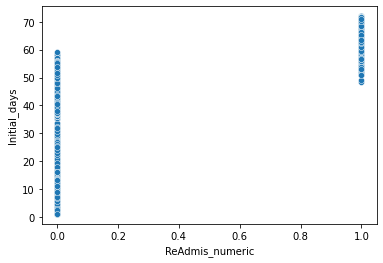

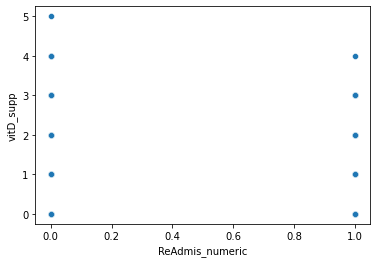

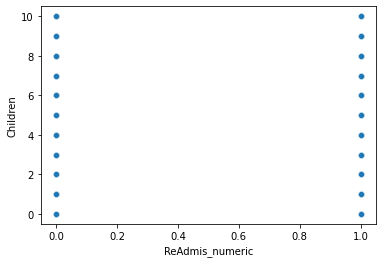

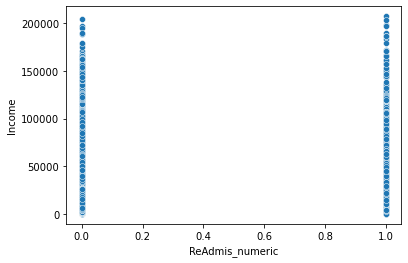

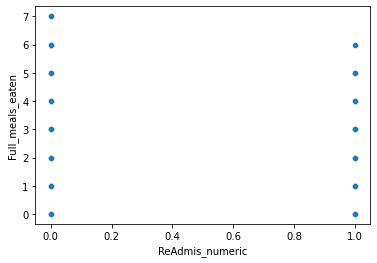

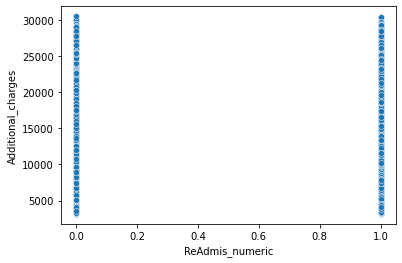

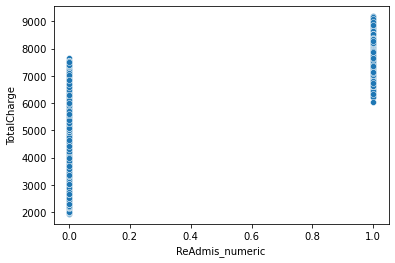

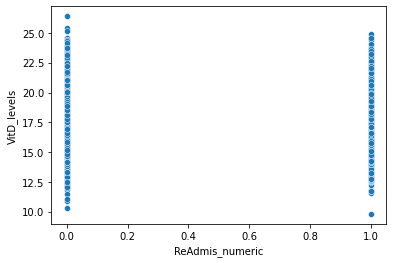

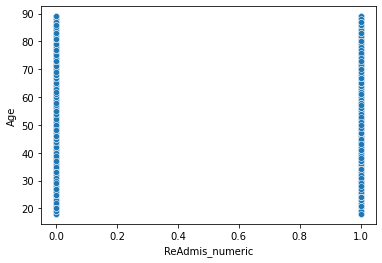

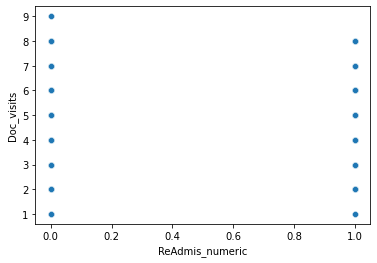

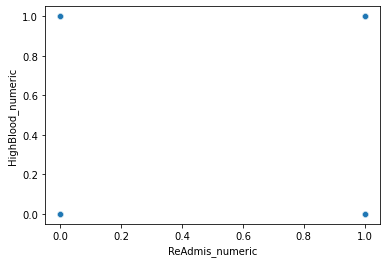

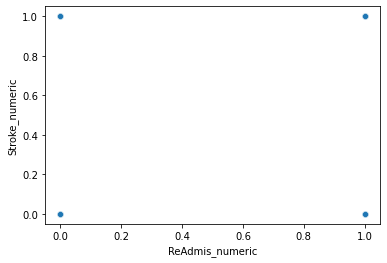

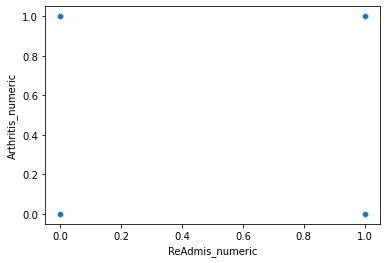

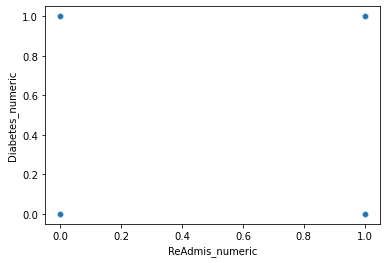

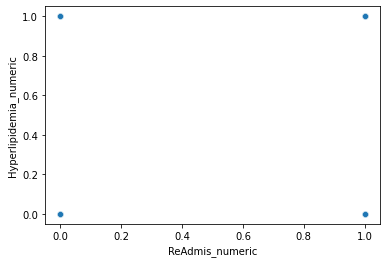

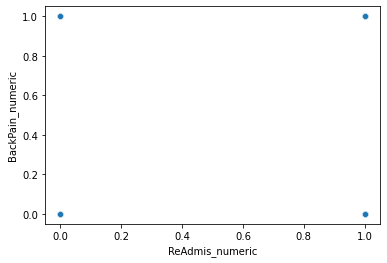

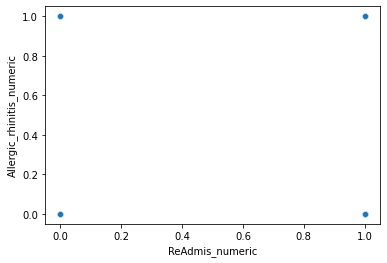

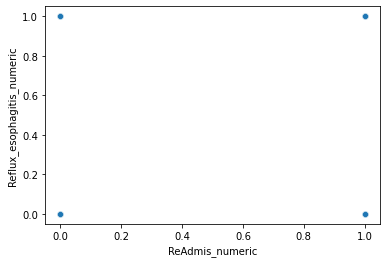

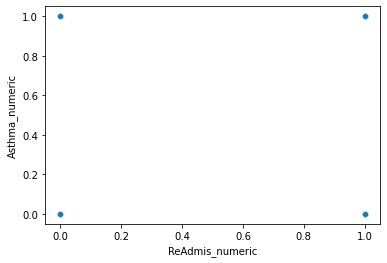

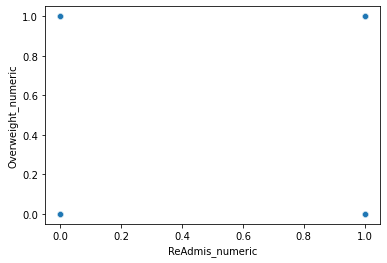

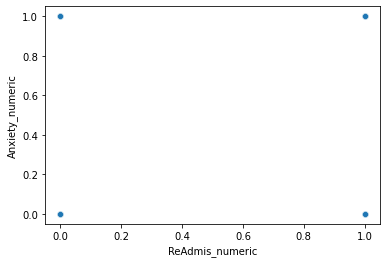

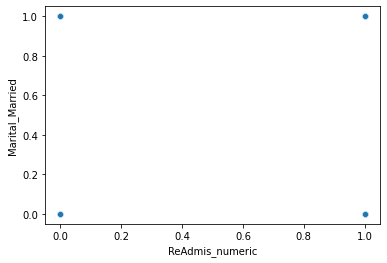

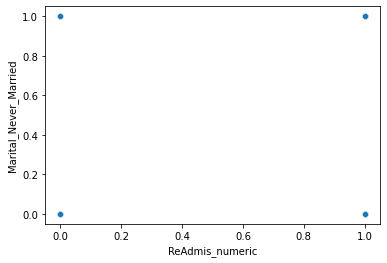

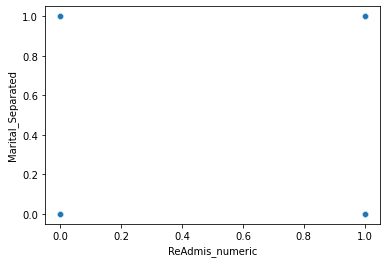

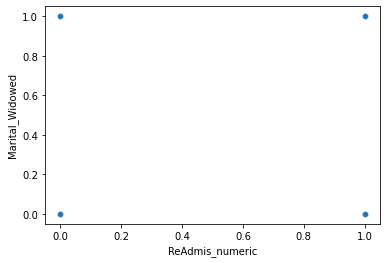

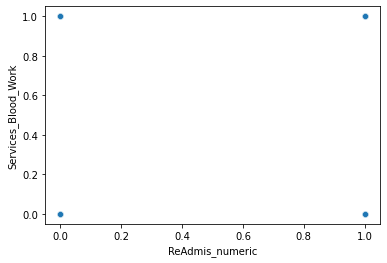

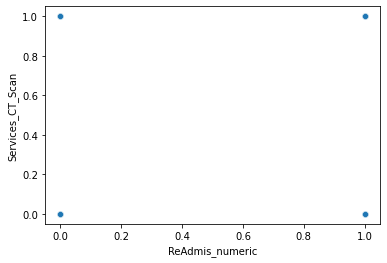

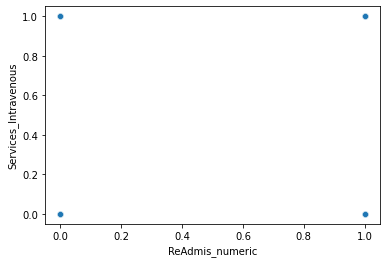

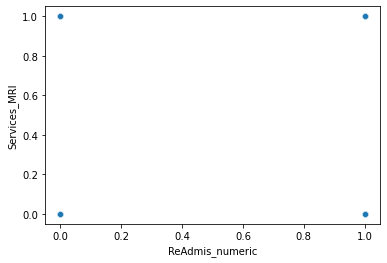

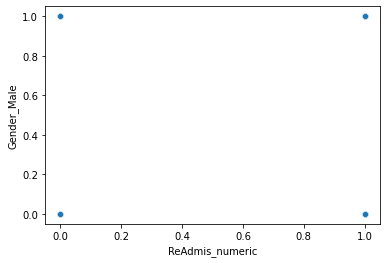

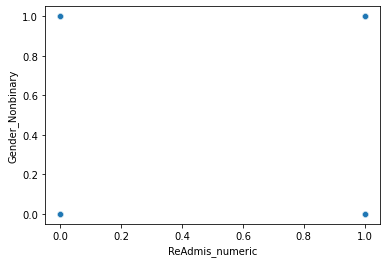

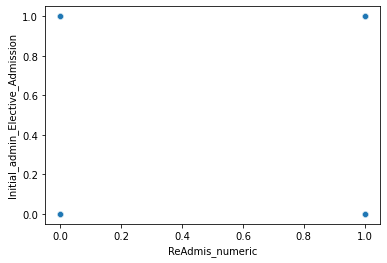

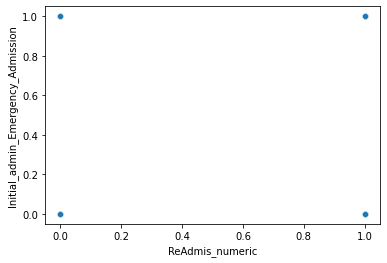

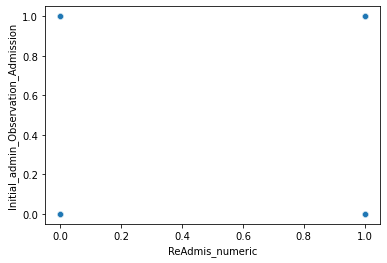

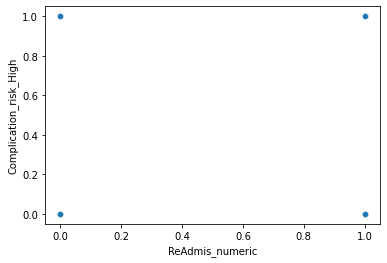

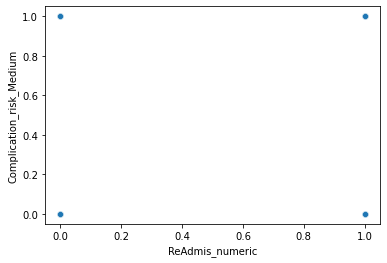

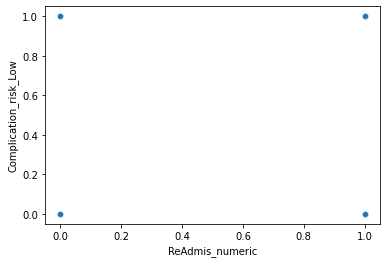

In [9]:
#Bivariate Visualizations
sns.scatterplot(data=df, y="Initial_days", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="vitD_supp", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Children", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Income", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Full_meals_eaten", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Additional_charges", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="TotalCharge", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="VitD_levels", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Age", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Doc_visits", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="HighBlood_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Stroke_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Arthritis_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Diabetes_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Hyperlipidemia_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="BackPain_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Allergic_rhinitis_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Reflux_esophagitis_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Asthma_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Overweight_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Anxiety_numeric", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Marital_Married", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Marital_Never_Married", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Marital_Separated", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Marital_Widowed", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Services_Blood_Work", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Services_CT_Scan", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Services_Intravenous", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Services_MRI", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Gender_Male", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Gender_Nonbinary", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Initial_admin_Elective_Admission", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Initial_admin_Emergency_Admission", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Initial_admin_Observation_Admission", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Complication_risk_High", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Complication_risk_Medium", x="ReAdmis_numeric")
plt.show()

sns.scatterplot(data=df, y="Complication_risk_Low", x="ReAdmis_numeric")
plt.show()

In [10]:
df.to_csv(r'C:\Users\mmorg\Desktop\D208 Assessment Files\Cleaned208data.csv')

In [11]:
#Initial Logistic Regression Model
mdl_readmis_vs_variables = logit("ReAdmis_numeric ~ Initial_days + vitD_supp + Children + Income + Full_meals_eaten + Additional_charges + TotalCharge + VitD_levels + Age + Doc_visits + HighBlood_numeric + Stroke_numeric + Arthritis_numeric + Diabetes_numeric + Hyperlipidemia_numeric + BackPain_numeric + Allergic_rhinitis_numeric + Reflux_esophagitis_numeric + Asthma_numeric + Overweight_numeric + Anxiety_numeric + Marital_Married + Marital_Never_Married + Marital_Separated + Marital_Widowed + Services_Blood_Work + Services_CT_Scan + Services_Intravenous + Services_MRI + Gender_Male + Gender_Nonbinary + Initial_admin_Elective_Admission + Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + Complication_risk_High + Complication_risk_Low + Complication_risk_Medium", data=df).fit()

print(mdl_readmis_vs_variables.params)

mdl_readmis_vs_variables.summary()

         Current function value: 0.032914
         Iterations: 35
Intercept                             -78.391168
Initial_days                           -1.143612
vitD_supp                              -0.105465
Children                                0.088933
Income                                  0.000002
Full_meals_eaten                        0.048269
Additional_charges                      0.000047
TotalCharge                             0.032097
VitD_levels                             0.029913
Age                                    -0.008115
Doc_visits                              0.006554
HighBlood_numeric                      -3.125420
Stroke_numeric                          1.651497
Arthritis_numeric                      -3.669106
Diabetes_numeric                       -1.908568
Hyperlipidemia_numeric                 -2.757763
BackPain_numeric                       -2.508272
Allergic_rhinitis_numeric              -2.268662
Reflux_esophagitis_numeric             -2.342286
Ast

C:\Users\mmorg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9965
Method:                           MLE   Df Model:                           34
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.9499
Time:                        22:22:07   Log-Likelihood:                -329.14
converged:                      False   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -78.3912        nan        nan        nan         nan         nan
Initial_days                           -1.1436    1.5e+04  -7.62e-05      1.000   -2.94e+04    2.94e+04
vitD_supp                              -0.1055      0.167     -0.632      0.528      -0.433       0.222
Children                                0.0889      0.046      1.913      0.056      -0.002       0.180
Income                               1.572e-06   3.62e-06      0.434      0.664   -5.53e-06    8.67e-06
Full_meals_eaten                        0.0483      0.103      0.469      0.639      -0.153       0.250
Additional_charges                   4.664e-05   6.25e-05      0.746      0.455   -7.58e-05       0.000
TotalCharge                             0.0321    183.195      0.000      1.000    -359.024     359.088
VitD_levels                             0.0299      0.049      0.613      0.540      -0.066       0.126
Age                                    -0.0081      0.015     -0.549      0.583      -0.037       0.021
Doc_visits                              0.0066      0.098      0.067      0.947      -0.186       0.200
HighBlood_numeric                      -3.1254   2.06e+04     -0.000      1.000   -4.03e+04    4.03e+04
Stroke_numeric                          1.6515      0.272      6.069      0.000       1.118       2.185
Arthritis_numeric                      -3.6691   1.32e+04     -0.000      1.000   -2.58e+04    2.58e+04
Diabetes_numeric                       -1.9086   1.38e+04     -0.000      1.000    -2.7e+04     2.7e+04
Hyperlipidemia_numeric                 -2.7578   1.72e+04     -0.000      1.000   -3.38e+04    3.37e+04
BackPain_numeric                       -2.5083   1.56e+04     -0.000      1.000   -3.06e+04    3.06e+04
Allergic_rhinitis_numeric              -2.2687   1.11e+04     -0.000      1.000   -2.18e+04    2.17e+04
Reflux_esophagitis_numeric             -2.3423   1.09e+04     -0.000      1.000   -2.14e+04    2.14e+04
Asthma_numeric                         -1.3891      0.237     -5.852      0.000      -1.854      -0.924
Overweight_numeric                     -0.2865      0.229     -1.250      0.211      -0.736       0.163
Anxiety_numeric                        -3.8172   1.58e+04     -0.000      1.000   -3.09e+04    3.09e+04
Marital_Married                         0.2686      0.331      0.811      0.418      -0.381       0.918
Marital_Never_Married                   0.3565      0.338      1.055      0.292      -0.306       1.019
Marital_Separated                      -0.1272      0.344     -0.369      0.712      -0.802       0.548
Marital_Widowed                         0.1362      0.333      0.409      0.682      -0.516       0.788
Services_Blood_Work                   -20.6768   4.07e+06  -5.08e-06      1.000   -7.98e+06    7.98e+06
Services_CT_Scan                      -19.0619   4.07e+06  -4.68e-06      1.000   -7.98e+06    7.98e+06
Services_Intraven

[[6261.   70.]
 [  60. 3609.]]
Accuracy: 0.987
Sensitivity: 0.9836467702371219
Specificity: 0.9889432948981204


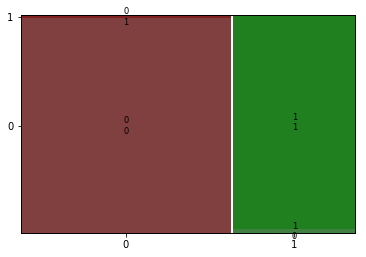

In [12]:
#Confusion Matrix for Initial Model

conf_matrix = mdl_readmis_vs_variables.pred_table()

print(conf_matrix)

from statsmodels.graphics.mosaicplot import mosaic

mosaic(conf_matrix)

#Calculating accuracy: the proportion of correct predictions 

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

acc = (TN + TP) / (TN + TP + FN + FP)
print('Accuracy:', acc)

#Sensitivity: proportion of true positives

sens = TP / (FN + TP)
print('Sensitivity:', sens)

#Specificity: proportion of true negatives

spec = TN / (TN + FP)
print('Specificity:', spec)


In [13]:
#Variable Selection
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Initial_days', 'vitD_supp', 'Children', 'Income', 'Full_meals_eaten', 'Additional_charges', 'TotalCharge', 'VitD_levels', 'Age', 'Doc_visits', 'HighBlood_numeric', 'Stroke_numeric', 'Arthritis_numeric', 'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric', 'Allergic_rhinitis_numeric', 'Reflux_esophagitis_numeric', 'Asthma_numeric', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Services_Blood_Work', 'Services_CT_Scan', 'Services_Intravenous', 'Services_MRI', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Elective_Admission', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 'Complication_risk_High', 'Complication_risk_Low', 'Complication_risk_Medium']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                feature          VIF
0                          Initial_days  2880.163153
1                             vitD_supp     1.003676
2                              Children     1.003506
3                                Income     1.002683
4                      Full_meals_eaten     1.004107
5                    Additional_charges    16.303881
6                           TotalCharge  2944.078834
7                           VitD_levels     1.003914
8                                   Age     9.273563
9                            Doc_visits     1.003377
10                    HighBlood_numeric     9.711378
11                       Stroke_numeric     1.010014
12                    Arthritis_numeric     1.760819
13                     Diabetes_numeric     1.696512
14               Hyperlipidemia_numeric     2.198017
15                     BackPain_numeric     2.112077
16            Allergic_rhinitis_numeric     1.551215
17           Reflux_esophagitis_numeric     1.

C:\Users\mmorg\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [14]:
#Reduced Model removing complication risk, initial admin, services, demographics, and charges columns due to VIF being high, redundancy, and high p-value

mdl_readmis_vs_variables1 = logit("ReAdmis_numeric ~ Initial_days + Children + Stroke_numeric + Asthma_numeric", data=df).fit()

print(mdl_readmis_vs_variables1.params)

mdl_readmis_vs_variables1.summary()

Optimization terminated successfully.
         Current function value: 0.045704
         Iterations 13
Intercept        -57.974445
Initial_days       1.065053
Children           0.069841
Stroke_numeric     1.273473
Asthma_numeric    -0.944019
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        ReAdmis_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.9305
Time:                        22:23:54   Log-Likelihood:                -457.04
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -57.9744      2.749    -21.087      0.000     -63.363     -52.586
Initial_days       1.0651      0.050     21.125      0.000       0.966       1.164
Children           0.0698      0.038      1.839      0.066      -0.005       0.144
Stroke_numeric     1.2735      0.223      5.706      0.000       0.836       1.711
Asthma_numeric    -0.9440      0.190     -4.975      0.000      -1.316      -0.572
==================================================================================

Possibly complete quasi-separation: A fraction 0.75 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

[[6228.  103.]
 [ 102. 3567.]]
Accuracy: 0.9795
Sensitivity: 0.9721995094031071
Specificity: 0.9837308482072342


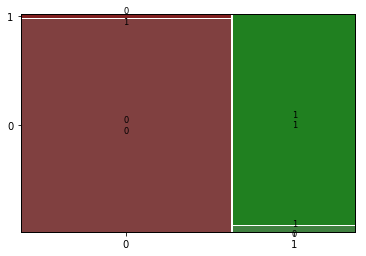

In [15]:
#Confusion Matrix for Reduced Model

conf_matrix = mdl_readmis_vs_variables1.pred_table()

print(conf_matrix)

from statsmodels.graphics.mosaicplot import mosaic

mosaic(conf_matrix)

#Calculating accuracy: the proportion of correct predictions 

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

acc = (TN + TP) / (TN + TP + FN + FP)
print('Accuracy:', acc)

#Sensitivity: proportion of true positives

sens = TP / (FN + TP)
print('Sensitivity:', sens)

#Specificity: proportion of true negatives

spec = TN / (TN + FP)
print('Specificity:', spec)

In [16]:
#Calculating AIC of Initial Model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#define response variable
y = df['ReAdmis_numeric']

#define predictor variables
x = df[['Initial_days', 'vitD_supp', 'Children', 'Income', 'Full_meals_eaten', 'Additional_charges', 'TotalCharge', 'VitD_levels', 'Age', 'Doc_visits', 'HighBlood_numeric', 'Stroke_numeric', 'Arthritis_numeric', 'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric', 'Allergic_rhinitis_numeric', 'Reflux_esophagitis_numeric', 'Asthma_numeric', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Services_Blood_Work', 'Services_CT_Scan', 'Services_Intravenous', 'Services_MRI', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Elective_Admission', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 'Complication_risk_High', 'Complication_risk_Low', 'Complication_risk_Medium']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view AIC of model
print(model.aic)

897.5899676679401


In [17]:
#Calculating AIC of Reduced Model #1

#define response variable
y = df['ReAdmis_numeric']

#define predictor variables
x = df[['Initial_days', 'Children', 'Stroke_numeric', 'Asthma_numeric', 'Overweight_numeric']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view AIC of model
print(model.aic)

918.392404996368


In [18]:
#Residual Standard Error for reduced model
np.sqrt(mdl_readmis_vs_variables1.scale)


1.0

<AxesSubplot:xlabel='ReAdmis_numeric'>

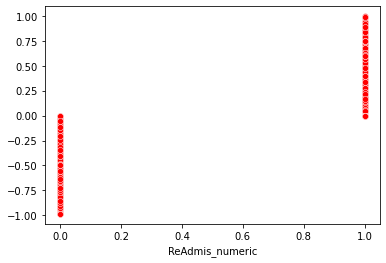

In [19]:
#Residual plot for reduced model
df['intercept'] = 1
residuals = df['ReAdmis_numeric'] - mdl_readmis_vs_variables1.predict(df[['Initial_days', 'Children', 'Stroke_numeric', 'Asthma_numeric', 'Overweight_numeric']])
sns.scatterplot(x=df['ReAdmis_numeric'], y=residuals, color='red')